In [1]:

# USA: 10Y Yield vs Inflation (funciona con "country|date|inflation_annual%")
# ==========================
import os, re
import pandas as pd
import matplotlib.pyplot as plt

# ---- Ruta de clean_data ----
clean_data = "/Users/heshamelsharkawy/Desktop/G_b_A/clean_data/clean_code.csv"

# ---- Leer data limpia exportado en el archivo Global_bond_limpieza.ipynb ----
df_clean = pd.read_csv(clean_data)

In [2]:
# Chequeo r√°pido de los datos estan leidos bien
df_clean.head()

Year  yield_10y  inflation_yoy  real_yield
0  1962   3.946064       1.198773    2.747291
1  1963   4.001566       1.239669    2.761897
2  1964   4.187360       1.278912    2.908448
3  1965   4.283695       1.585169    2.698526
4  1966   4.925040       3.015075    1.909965


√öltimos a√±os limpios:
    Year  yield_10y  inflation_yoy  real_yield
51  2013   2.350160       1.464833    0.885327
52  2014   2.539560       1.622223    0.917337
53  2015   2.138287       0.118627    2.019660
54  2016   1.837440       1.261583    0.575857
55  2017   2.329480       2.130110    0.199370
56  2018   2.911245       2.442583    0.468662
57  2019   2.141400       1.812210    0.329190
58  2020   0.889203       1.233584   -0.344381
59  2021   1.446853       4.697859   -3.251006
60  2022   2.950562       8.002800   -5.052238


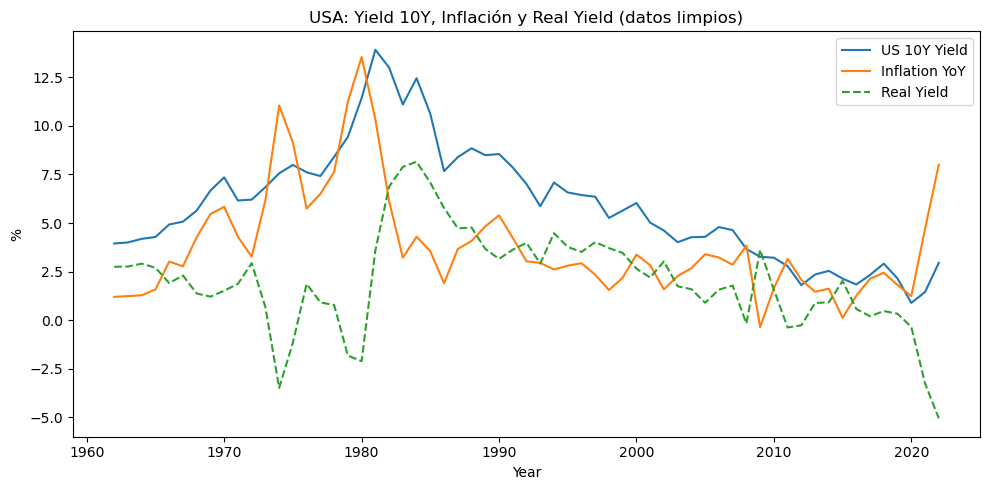

In [3]:

# ===============================
# Paso 3: Chequeo r√°pido
# ===============================
print("\n√öltimos a√±os limpios:")
print(df_clean.tail(10))

# ===============================
# Paso 4: Visualizaci√≥n post-limpieza
# ===============================

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_clean["Year"], df_clean["yield_10y"], label="US 10Y Yield")
plt.plot(df_clean["Year"], df_clean["inflation_yoy"], label="Inflation YoY")
plt.plot(df_clean["Year"], df_clean["real_yield"], label="Real Yield", linestyle="--")
plt.title("USA: Yield 10Y, Inflaci√≥n y Real Yield (datos limpios)")
plt.xlabel("Year")
plt.ylabel("%")
plt.legend()
plt.tight_layout()
plt.show()


### Interpretaci√≥n r√°pida del gr√°fico

A√±os 70s ‚Äì 80s:

La inflaci√≥n se dispara (choques del petr√≥leo).

Los rendimientos nominales (azul) tambi√©n suben fuerte.

El rendimiento real (verde) se mantiene positivo pero muy vol√°til.

A√±os 90s ‚Äì 2000s:

Inflaci√≥n baja y estable (2‚Äì3%).

Yield nominal cae gradualmente.

El rendimiento real es bajo pero estable.

2010s en adelante:

Rendimientos muy bajos (pol√≠tica monetaria expansiva).

Inflaci√≥n estable‚Ä¶ hasta el repunte 2021‚Äì2022.

En 2021‚Äì2022 el real yield se hace negativo (bonos pierden contra inflaci√≥n).

#### Qu√© significa:

Cuando el real yield es positivo ‚Üí los bonos dan un retorno por encima de la inflaci√≥n (buen refugio).

Cuando el real yield es negativo ‚Üí los inversores pierden poder adquisitivo aunque inviertan en bonos.

#### Correlaci√≥n con datos limpios ---


In [4]:
print("\n--- Correlaci√≥n simple (datos limpios) ---")
print(df_clean[["yield_10y", "inflation_yoy"]].corr())



--- Correlaci√≥n simple (datos limpios) ---
               yield_10y  inflation_yoy
yield_10y       1.000000       0.616816
inflation_yoy   0.616816       1.000000


#### Regresi√≥n lineal simple (datos limpios)


In [5]:
import statsmodels.api as sm

X = df_clean[["inflation_yoy"]]
y = df_clean["yield_10y"]

# Agregar constante al modelo
X = sm.add_constant(X)

model_clean = sm.OLS(y, X).fit()
print("\n--- Regresi√≥n lineal simple (datos limpios) ---")
print(model_clean.summary())



--- Regresi√≥n lineal simple (datos limpios) ---
                            OLS Regression Results                            
Dep. Variable:              yield_10y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     36.23
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           1.20e-07
Time:                        18:28:25   Log-Likelihood:                -137.94
No. Observations:                  61   AIC:                             279.9
Df Residuals:                      59   BIC:                             284.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

#### Interpretaci√≥n del output de la regresi√≥n lineal:

Coeficientes (const y inflaci√≥n)

Constante (const = 3.3783) ‚Üí cuando la inflaci√≥n es 0, el rendimiento de los bonos a 10 a√±os tiende a estar en torno al 3.38%.

Inflaci√≥n (0.6571) ‚Üí por cada +1% en inflaci√≥n, el yield sube en promedio +0.66 puntos porcentuales. Esto confirma una relaci√≥n positiva clara.

R¬≤ (0.380)

El 38% de la variabilidad del rendimiento de los bonos a 10 a√±os se explica por la inflaci√≥n.

Esto significa que la inflaci√≥n influye mucho, pero no lo explica todo (hay otros factores: pol√≠tica monetaria, expectativas, prima de riesgo, etc.).

p-values

Ambos coeficientes (constante e inflaci√≥n) tienen p < 0.001, es decir, son estad√≠sticamente significativos.

La relaci√≥n no es casualidad: hay evidencia fuerte de que la inflaci√≥n impacta en el yield.

Durbin-Watson (0.227)

Valor bajo ‚Üí indica que puede haber autocorrelaci√≥n en los errores (normal en series temporales).

Esto nos dice que quiz√° m√°s adelante necesitemos un modelo de series temporales (ARIMA, VAR) o un modelo con variables adicionales.

#### Conclusi√≥n r√°pida para tu proyecto
üëâ Existe una relaci√≥n positiva y estad√≠sticamente significativa entre la inflaci√≥n y el rendimiento del bono USA 10Y: cuando la inflaci√≥n sube, el yield tambi√©n sube, aunque la inflaci√≥n explica solo un 38% de la variaci√≥n.

### ispersi√≥n inflaci√≥n vs yield con la recta de regresi√≥n

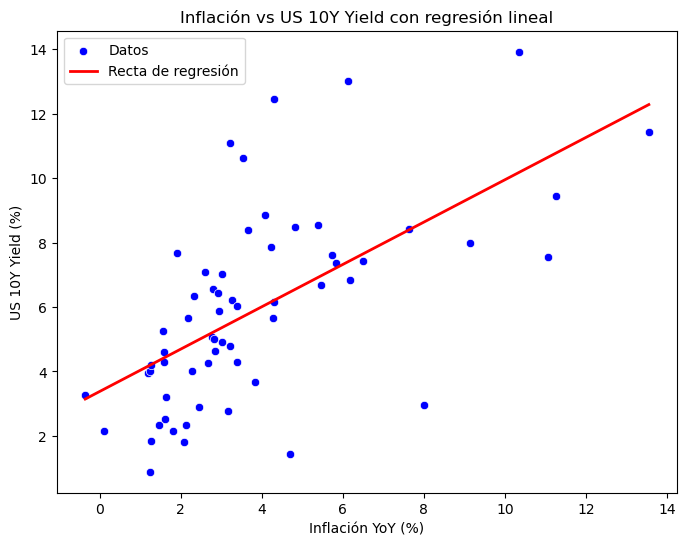

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot con la recta de regresi√≥n
plt.figure(figsize=(8,6))
sns.scatterplot(x="inflation_yoy", y="yield_10y", data=df_clean, color="blue", label="Datos")

# Ajustar la recta
coef = 0.6571
intercept = 3.3783
x_vals = np.linspace(df_clean["inflation_yoy"].min(), df_clean["inflation_yoy"].max(), 100)
y_vals = intercept + coef * x_vals
plt.plot(x_vals, y_vals, color="red", linewidth=2, label="Recta de regresi√≥n")

# T√≠tulos
plt.title("Inflaci√≥n vs US 10Y Yield con regresi√≥n lineal")
plt.xlabel("Inflaci√≥n YoY (%)")
plt.ylabel("US 10Y Yield (%)")
plt.legend()
plt.show()


### ecuaci√≥n y el R¬≤

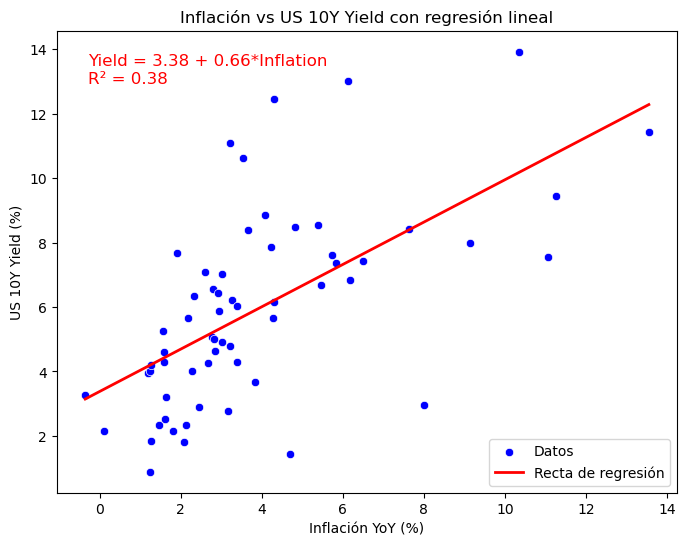

In [7]:
# Scatter plot con recta de regresi√≥n y ecuaci√≥n
plt.figure(figsize=(8,6))
sns.scatterplot(x="inflation_yoy", y="yield_10y", data=df_clean, color="blue", label="Datos")

# Recta de regresi√≥n
coef = 0.6571
intercept = 3.3783
r2 = 0.38  # R-cuadrado de tu modelo
x_vals = np.linspace(df_clean["inflation_yoy"].min(), df_clean["inflation_yoy"].max(), 100)
y_vals = intercept + coef * x_vals
plt.plot(x_vals, y_vals, color="red", linewidth=2, label="Recta de regresi√≥n")

# Texto con ecuaci√≥n
plt.text(0.05, 0.95,
         f"Yield = {intercept:.2f} + {coef:.2f}*Inflation\nR¬≤ = {r2:.2f}",
         transform=plt.gca().transAxes,
         fontsize=12, color="red", verticalalignment="top")

# T√≠tulos y etiquetas
plt.title("Inflaci√≥n vs US 10Y Yield con regresi√≥n lineal")
plt.xlabel("Inflaci√≥n YoY (%)")
plt.ylabel("US 10Y Yield (%)")
plt.legend()
plt.show()


### Diagn√≥stico del modelo (OLS)


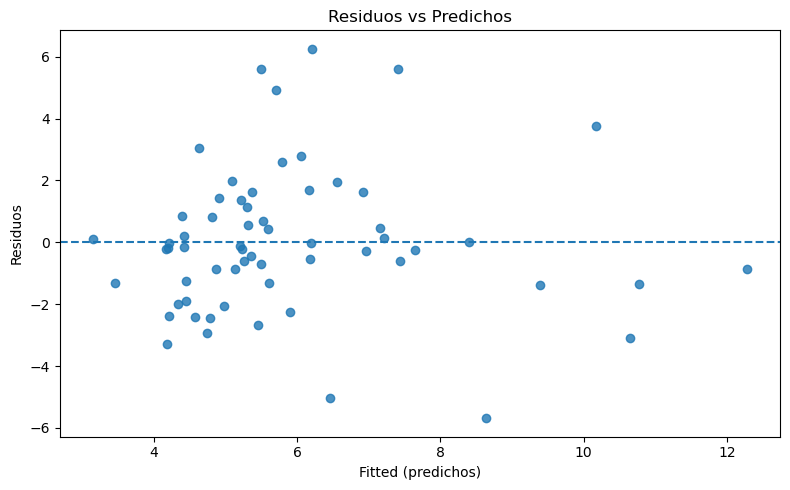

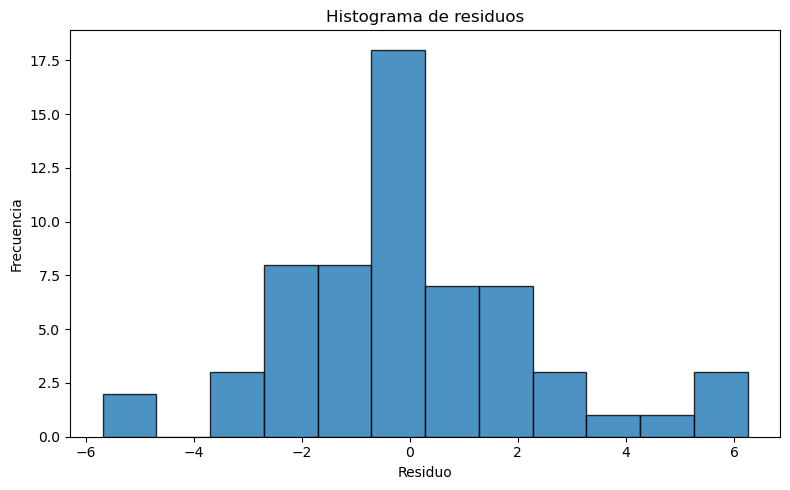

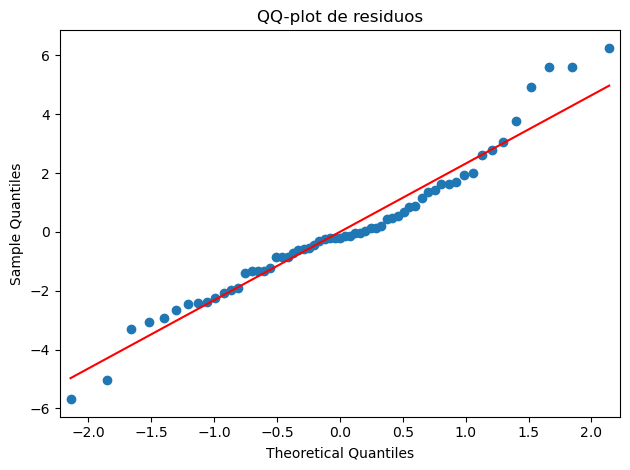

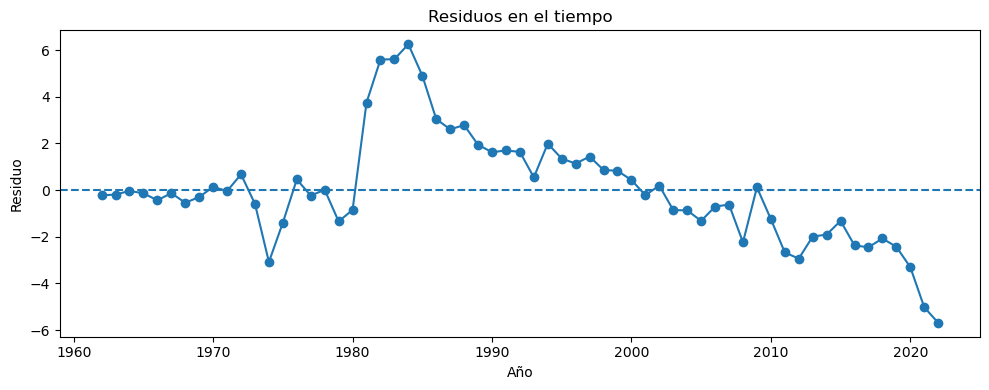


--- Tests de diagn√≥stico ---
Jarque-Bera: stat=3.936, p-value=0.1397  (skew=0.474, kurt=3.805)
Breusch-Pagan: stat=1.790, p-value=0.1809

Ljung-Box (p-values):
lag1     2.083919e-11
lag4     4.153785e-23
lag8     4.451972e-27
lag12    2.479677e-26
Name: lb_pvalue, dtype: float64

Durbin-Watson: 0.227


In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from scipy import stats

# 1) Recalcular (por si abriste sesi√≥n nueva)
X = sm.add_constant(df_clean[["inflation_yoy"]])
y = df_clean["yield_10y"]
model_clean = sm.OLS(y, X).fit()

# 2) Residuales y ajustados
fitted = model_clean.fittedvalues
resid   = model_clean.resid
std_res = (resid - resid.mean()) / resid.std(ddof=1)

# 3) Plots b√°sicos
plt.figure(figsize=(8,5))
plt.scatter(fitted, resid, alpha=0.8)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted (predichos)")
plt.ylabel("Residuos")
plt.title("Residuos vs Predichos")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.hist(resid, bins=12, edgecolor="k", alpha=0.8)
plt.title("Histograma de residuos")
plt.xlabel("Residuo"); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()

sm.qqplot(resid, line="s")
plt.title("QQ-plot de residuos")
plt.tight_layout(); plt.show()

# Residuos a lo largo del tiempo (para ver autocorrelaci√≥n visual)
plt.figure(figsize=(10,4))
plt.plot(df_clean["Year"], resid, marker="o")
plt.axhline(0, linestyle="--")
plt.title("Residuos en el tiempo")
plt.xlabel("A√±o"); plt.ylabel("Residuo")
plt.tight_layout(); plt.show()

# 4) Tests estad√≠sticos
print("\n--- Tests de diagn√≥stico ---")

# Normalidad (Jarque‚ÄìBera)
try:
    # statsmodels siempre devuelve (jb, pvalue, skew, kurtosis)
    from statsmodels.stats.stattools import jarque_bera as sm_jb
    jb_stat, jb_p, jb_skew, jb_kurt = sm_jb(resid)
except Exception:
    # fallback: SciPy (puede devolver solo 2 valores)
    from scipy import stats
    jb = stats.jarque_bera(resid)
    if hasattr(jb, "__len__") and len(jb) >= 2:
        jb_stat, jb_p = jb[0], jb[1]
        jb_skew = jb_kurt = float("nan")
    else:
        jb_stat = float(jb)
        jb_p = float("nan")
        jb_skew = jb_kurt = float("nan")
print(f"Jarque-Bera: stat={jb_stat:.3f}, p-value={jb_p:.4f}  (skew={jb_skew:.3f}, kurt={jb_kurt:.3f})")

# Heterocedasticidad (Breusch‚ÄìPagan)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_stat, bp_p, _, _ = het_breuschpagan(resid, X)
print(f"Breusch-Pagan: stat={bp_stat:.3f}, p-value={bp_p:.4f}")

# Autocorrelaci√≥n en residuos (Ljung‚ÄìBox)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb = acorr_ljungbox(resid, lags=[1, 4, 8, 12], return_df=True)
print("\nLjung-Box (p-values):")
print(lb["lb_pvalue"].rename(index={1:"lag1",4:"lag4",8:"lag8",12:"lag12"}))

# Durbin‚ÄìWatson
from statsmodels.stats.stattools import durbin_watson
print(f"\nDurbin-Watson: {durbin_watson(resid):.3f}")



#### 1. Normalidad de los residuos (Jarque‚ÄìBera)

JB = 3.936, p-value = 0.1397

Como p > 0.05 ‚Üí no rechazamos la hip√≥tesis nula de normalidad.
‚úÖ Los residuos son aproximadamente normales ‚Üí buen s√≠ntoma.

2. Heterocedasticidad (Breusch‚ÄìPagan)

BP = 1.790, p-value = 0.1809

Como p > 0.05 ‚Üí no hay evidencia fuerte de heterocedasticidad.
‚úÖ La varianza de los errores parece estable ‚Üí los errores est√°ndar son confiables.

3. Autocorrelaci√≥n (Ljung‚ÄìBox + Durbin-Watson)

Ljung‚ÄìBox:

lag1, lag4, lag8, lag12 ‚Üí p-values casi cero ‚Üí rechazamos la hip√≥tesis de ‚Äúno autocorrelaci√≥n‚Äù.
‚ùå Hay autocorrelaci√≥n muy fuerte en los residuos.

Durbin‚ÄìWatson = 0.227

Valores cercanos a 2 = no autocorrelaci√≥n.

Valores < 1 = fuerte autocorrelaci√≥n positiva.

Aqu√≠ 0.227 ‚Üí autocorrelaci√≥n positiva extrema.

#### En resumen:

Normalidad: bien.

Homocedasticidad: bien.

Autocorrelaci√≥n: muy mal ‚Üí el modelo lineal cl√°sico OLS no captura la din√°mica temporal.

üëâ Esto significa que tu modelo simple (Yield ~ Inflaci√≥n) ignora la dependencia temporal. Los rendimientos de bonos son series temporales, por eso los residuos siguen un patr√≥n.

#### Reestimaci√≥n con errores robustos HAC (Newey-West)

In [9]:

import statsmodels.api as sm

X = sm.add_constant(df_clean[["inflation_yoy"]])
y = df_clean["yield_10y"]

# Modelo OLS
ols_model = sm.OLS(y, X).fit()

# Ajuste con errores robustos HAC (Newey-West)
# lag=4 (aprox. autocorrelaci√≥n hasta 4 rezagos, puedes probar otros valores)
nw_model = ols_model.get_robustcov_results(cov_type="HAC", maxlags=4)

print("\n--- Regresi√≥n OLS con errores HAC (Newey-West) ---")
print(nw_model.summary())



--- Regresi√≥n OLS con errores HAC (Newey-West) ---
                            OLS Regression Results                            
Dep. Variable:              yield_10y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     32.46
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           4.09e-07
Time:                        18:28:32   Log-Likelihood:                -137.94
No. Observations:                  61   AIC:                             279.9
Df Residuals:                      59   BIC:                             284.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

 

#### üëâ ¬øQu√© cambi√≥ con HAC?

Coeficientes (constante = 3.37, inflaci√≥n = 0.65) ‚Üí no cambiaron, porque la relaci√≥n base sigue siendo la misma.

Errores est√°ndar (y por tanto t-stats y p-values) ‚Üí son m√°s grandes que antes (ej. la constante pas√≥ de std=0.51 a 0.69).

Pero siguen siendo muy significativos (p<0.001) ‚Üí conclusi√≥n: la relaci√≥n inflaci√≥n ‚Üí yield sigue siendo estad√≠sticamente fuerte.

Ahora los intervalos de confianza son m√°s realistas, porque tienen en cuenta la autocorrelaci√≥n.

‚úÖ En resumen: ya tienemos un modelo lineal robusto que muestra que por cada +1% de inflaci√≥n, el rendimiento a 10 a√±os sube ~0.65% en promedio, con bastante confianza.